# Домашняя работа №2

In [5]:
import numpy as np
from scipy.optimize import approx_fprime

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

$f'_x=4*x*y^3-1/x^2+y^2$

$f'_y=6*x^2*y^2+2*x*y$

$f'_x(1,2)=4*1*2^3-1/1+2^2=35$

$f'_y(1,2)=6*1*2^2+2*1*2=28$

In [19]:
def func(x, c0, c1):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2*x[1]**3 + 1/x[0] * x[1]**2*x[0] + c1

In [21]:
x = [1,2]
c0, c1 = (2, 7)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1)

array([32.00000024, 28.00000024])

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [56]:
import pandas as pd
data = pd.read_csv('video.csv')
print(len(data))
data.head()

1237


,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


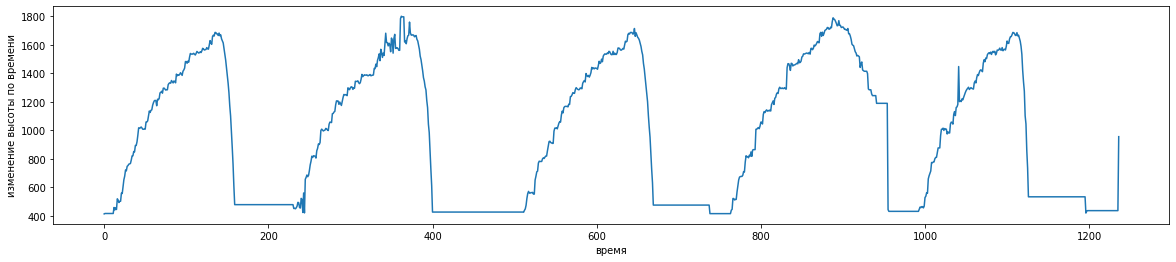

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.xlabel('время')
plt.ylabel('изменение высоты по времени')

plt.show()

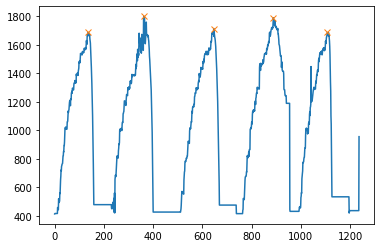

In [58]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()

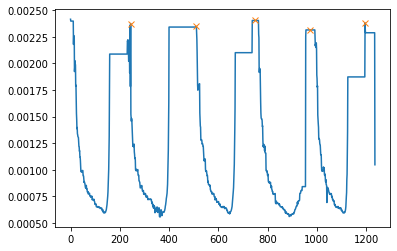

In [67]:
inv_data = 1/data
peaks, _ = find_peaks(inv_data.height, prominence=0.001, width=1)
plt.plot(inv_data.height)
plt.plot(peaks, inv_data.height[peaks], "x")
plt.show()

In [68]:
from scipy.signal import find_peaks_cwt

# maxima : use builtin function to find (max) peaks
max_peakind = find_peaks_cwt(inv_data.height, np.arange(1,10))


# minima : use builtin function fo find (min) peaks (use inversed data)
min_peakind = find_peaks_cwt(inv_data.height, np.arange(1,10))

#show results
print("maxima",  inv_data.height[max_peakind])
print("minima",  inv_data.height[min_peakind])

maxima 4       0.002398
20      0.001988
51      0.000944
66      0.000823
86      0.000745
93      0.000712
126     0.000636
162     0.002088
239     0.002198
273     0.001001
274     0.000959
296     0.000804
312     0.000749
327     0.000721
357     0.000633
403     0.002342
510     0.002342
524     0.001808
547     0.001100
566     0.000845
581     0.000772
592     0.000721
601     0.000700
602     0.000687
629     0.000639
632     0.000635
672     0.002101
742     0.002404
762     0.002404
770     0.001938
791     0.001156
813     0.000847
829     0.000769
846     0.000668
863     0.000639
959     0.002315
995     0.002183
999     0.002137
1015    0.001183
1030    0.001018
1059    0.000775
1070    0.000708
1087    0.000649
1094    0.000633
1129    0.001873
1200    0.002288
1232    0.002288
Name: height, dtype: float64
minima 4       0.002398
20      0.001988
51      0.000944
66      0.000823
86      0.000745
93      0.000712
126     0.000636
162     0.002088
239     0.002198
273  

In [77]:
min_peakind = find_peaks(inv_data.height, prominence=0.001, width=1)
min_peakind

(array([ 244,  511,  750,  974, 1196], dtype=int64),
 {'prominences': array([0.00178253, 0.00176433, 0.00184519, 0.00172205, 0.00133493]),
  'left_bases': array([136, 362, 362, 888, 888], dtype=int64),
  'right_bases': array([ 362,  646,  888, 1107, 1236], dtype=int64),
  'widths': array([ 88.70273566, 127.80163297, 107.25944439,  50.93694691,
         109.77241343]),
  'width_heights': array([0.00148403, 0.00146525, 0.00148125, 0.00145379, 0.00171349]),
  'left_ips': array([ 157.52753777,  398.34834829,  667.51765058,  954.4344843 ,
         1125.69030792]),
  'right_ips': array([ 246.23027344,  526.14998126,  774.77709497, 1005.37143121,
         1235.46272135])})